<a href="https://colab.research.google.com/github/bonareri/Machine_Learning_1/blob/main/Credit_Risk_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CREDIT RISK MODELLING

##Libraries and Data Import

In [1]:
# General Libraries

import warnings
warnings.filterwarnings('ignore')

# Data Explotation libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #Visualization
import seaborn as sns #Advanced Visualization
%matplotlib inline

# Data modelling libraries
from sklearn.impute import SimpleImputer
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import f1_score

In [3]:
# Loading Data
credit_risk = pd.read_csv('/content/raw-data.csv')
credit_risk.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,...,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,...,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0
2,3,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,SC,...,NaN,105000.0,38900.0,34.0,31.0,31,31,16,TIER 1,0
3,4,0,0,24.0,0.0,2128.0,42900.0,24.0,1375.0,SC,...,NaN,NaN,42900.0,NaN,NaN,0,0,0,TIER 1,0
4,5,0,0,27.0,0.0,1824.0,40900.0,30.0,4140.0,MC,...,NaN,NaN,40900.0,NaN,NaN,0,0,0,TIER 1,0


In [4]:
#Renaming columns in the dataset with their correct names
credit_risk_renamed = credit_risk.rename(columns={'V1': 'Customer ID',
'V2': 'Customer has bounced in first EMI',
'V3': 'No of times bounced 12 months',
'V4': 'Maximum MOB',
'V5': 'No of times bounced while repaying the loan',
'V6': 'EMI',
'V7': 'Loan Amount',
'V8': 'Tenure',
'V9': 'Dealer codes from where customer has purchased the Two wheeler',
'V10': 'Product code of Two wheeler',
'V11': 'No of advance EMI paid',
'V12': 'Rate of interest',
'V13': 'Gender',
'V14': 'Employment type',
'V15': 'Resident type of customer',
'V16': 'Date of birth',
'V17': 'Customer age when loanwas taken',
'V18': 'No of loans',
'V19': 'No of secured loans',
'V20': 'No of unsecured loans',
'V21': 'Max amount sanctioned in the Live loans',
'V22': 'No of new loans in last 3 months',
'V23': 'Total sanctioned amount in the secured Loans which are Live',
'V24': 'Total sanctioned amount in the unsecured Loans which are Live',
'V25': 'Maximum amount sanctioned for any Two wheeler loan',
'V26': 'Time since last Personal loan taken (in months)',
'V27': 'Time since first consumer durables loan taken (in months)',
'V28': 'No of times 30 days past due in last 6 months',
'V29': 'No of times 60 days past due in last 6 months',
'V30': 'No of times 90 days past due in last 3 months',
'V31': 'Tier',
'V32': 'Target variable'})
credit_risk_renamed.head(2)

,Customer ID,Customer has bounced in first EMI,No of times bounced 12 months,Maximum MOB,No of times bounced while repaying the loan,EMI,Loan Amount,Tenure,Dealer codes from where customer has purchased the Two wheeler,Product code of Two wheeler,...,Total sanctioned amount in the secured Loans which are Live,Total sanctioned amount in the unsecured Loans which are Live,Maximum amount sanctioned for any Two wheeler loan,Time since last Personal loan taken (in months),Time since first consumer durables loan taken (in months),No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months,Tier,Target variable
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,...,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,...,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0


## Exploratory Data Analysis (EDA)

In [5]:
credit_risk_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119528 entries, 0 to 119527
Data columns (total 32 columns):
 #   Column                                                          Non-Null Count   Dtype  
---  ------                                                          --------------   -----  
 0   Customer ID                                                     119528 non-null  int64  
 1   Customer has bounced in first EMI                               119528 non-null  int64  
 2   No of times bounced 12 months                                   119528 non-null  int64  
 3   Maximum MOB                                                     85048 non-null   float64
 4   No of times bounced while repaying the loan                     85048 non-null   float64
 5   EMI                                                             85048 non-null   float64
 6   Loan Amount                                                     85048 non-null   float64
 7   Tenure                                

In [40]:
#percentage of missing values ordered
credit_risk_renamed.isnull().mean().sort_values(ascending=False)

,0
Time since last Personal loan taken (in months),0.887633
Total sanctioned amount in the unsecured Loans which are Live,0.840807
Total sanctioned amount in the secured Loans which are Live,0.838691
Time since first consumer durables loan taken (in months),0.829053
Max amount sanctioned in the Live loans,0.693578
Resident type of customer,0.296140
No of advance EMI paid,0.288468
Date of birth,0.288468
Employment type,0.288468
Rate of interest,0.288468


In [6]:
credit_risk_renamed.describe()

,Customer ID,Customer has bounced in first EMI,No of times bounced 12 months,Maximum MOB,No of times bounced while repaying the loan,EMI,Loan Amount,Tenure,Dealer codes from where customer has purchased the Two wheeler,No of advance EMI paid,...,No of new loans in last 3 months,Total sanctioned amount in the secured Loans which are Live,Total sanctioned amount in the unsecured Loans which are Live,Maximum amount sanctioned for any Two wheeler loan,Time since last Personal loan taken (in months),Time since first consumer durables loan taken (in months),No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months,Target variable
count,119528.000000,119528.000000,119528.000000,85048.000000,85048.000000,85048.000000,85048.000000,85048.000000,85048.000000,85048.000000,...,119528.0,1.928100e+04,1.902800e+04,104467.000000,13431.000000,20433.000000,119528.000000,119528.000000,119528.000000,119528.000000
mean,59764.500000,0.028378,0.473061,17.217148,0.690857,2325.701298,39338.081648,21.060048,3512.692233,0.643930,...,0.0,4.302522e+05,1.766494e+05,41415.210047,46.980940,48.208976,1.076877,0.823991,0.344898,0.021869
std,34504.905825,0.166052,0.859042,5.203209,1.091658,575.614365,11016.619745,5.698900,3754.675342,0.969123,...,0.0,8.228143e+05,4.075618e+05,13044.008078,42.716225,41.713826,3.737882,3.172612,1.478180,0.146258
min,1.000000,0.000000,0.000000,2.000000,0.000000,681.000000,10000.000000,6.000000,1001.000000,0.000000,...,0.0,9.900000e+01,1.000000e+00,10000.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000
25%,29882.750000,0.000000,0.000000,14.000000,0.000000,1895.000000,30000.000000,18.000000,1368.000000,0.000000,...,0.0,4.490000e+04,3.394050e+04,31000.000000,20.000000,23.000000,0.000000,0.000000,0.000000,0.000000
50%,59764.500000,0.000000,0.000000,17.000000,0.000000,2320.000000,39700.000000,24.000000,2307.000000,0.000000,...,0.0,1.100000e+05,8.800000e+04,42250.000000,31.000000,35.000000,0.000000,0.000000,0.000000,0.000000
75%,89646.250000,0.000000,1.000000,21.000000,1.000000,2689.000000,48000.000000,24.000000,3911.000000,1.000000,...,0.0,4.920000e+05,2.000048e+05,49300.000000,52.000000,55.000000,0.000000,0.000000,0.000000,0.000000
max,119528.000000,1.000000,12.000000,36.000000,29.000000,7840.000000,96000.000000,36.000000,21106.000000,6.000000,...,0.0,2.022777e+07,3.000000e+07,700000.000000,252.000000,268.000000,314.000000,243.000000,96.000000,1.000000


### Data distribution for numerical and categorical features

In [10]:
# Separate numerical and categorical columns
numerical_features = credit_risk.select_dtypes(include=['int64', 'float64']).columns
categorical_features = credit_risk.select_dtypes(include=['object', 'category']).columns

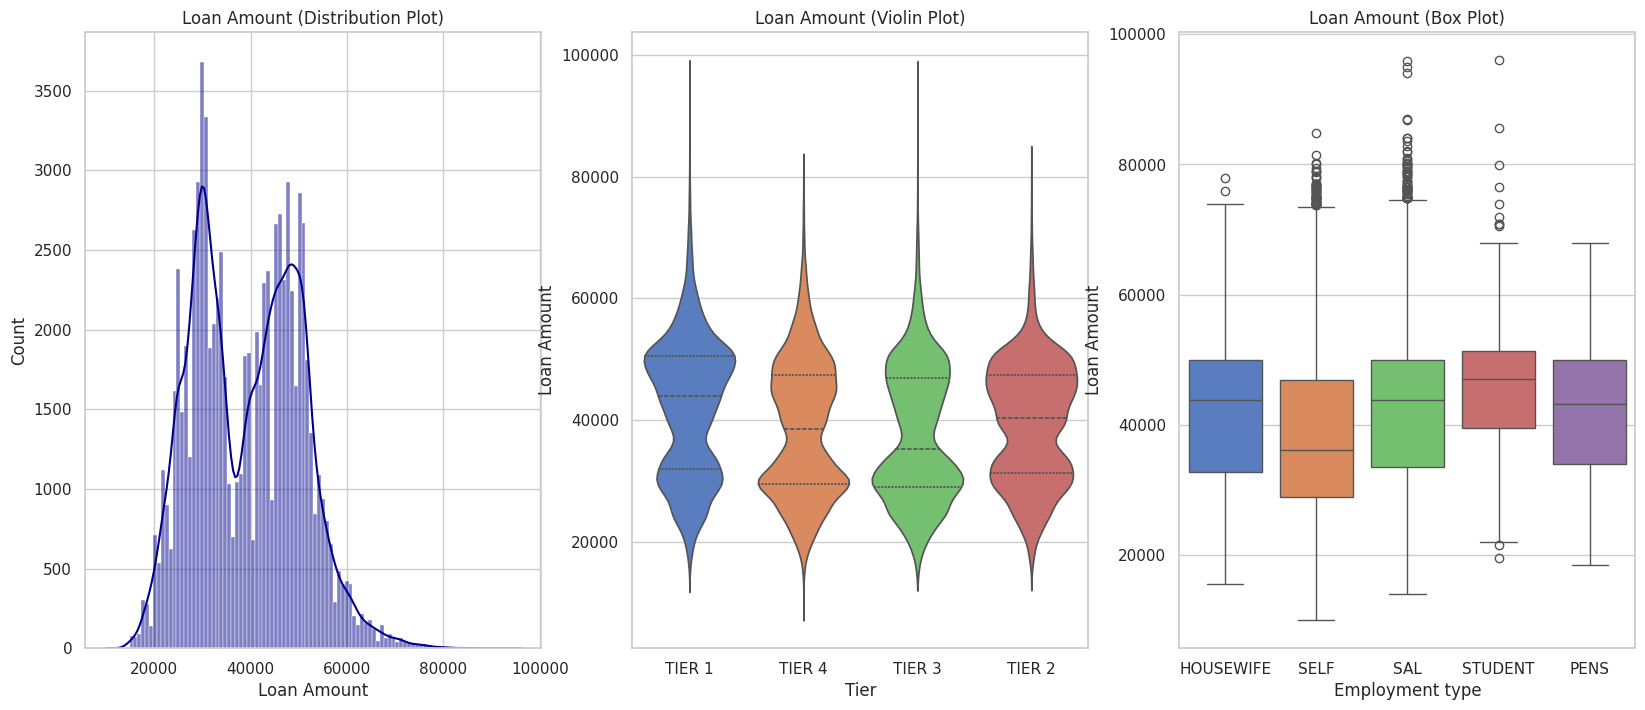

In [17]:
sns.set(style="whitegrid")

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))

ax[0].set_title("Loan Amount (Distribution Plot)")
sns.histplot(credit_risk_renamed['Loan Amount'], ax=ax[0], kde=True, color='darkblue')
ax[1].set_title("Loan Amount (Violin Plot)")
sns.violinplot(data=credit_risk_renamed, x='Tier', y='Loan Amount', ax=ax[1], inner="quartile", palette='muted')
ax[2].set_title("Loan Amount (Box Plot)")
sns.boxplot(data=credit_risk_renamed, x='Employment type', y='Loan Amount', ax=ax[2], orient='v', palette='muted')
plt.show()

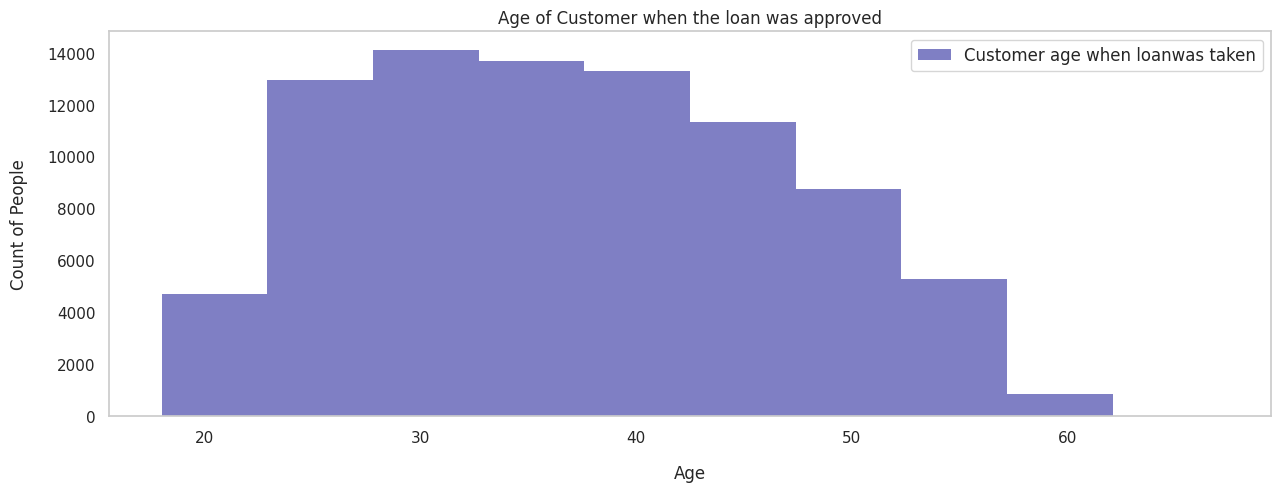

In [20]:
plt.figure(figsize=(15, 5))

# Histogram for age at which the client took the loan
credit_risk_renamed['Customer age when loanwas taken'].plot(kind='hist', color='darkblue', alpha=0.5, edgecolor='none')

plt.xlabel("Age", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title("Age of Customer when the loan was approved")
plt.legend(loc="best", prop={"size": 12})

plt.gca().grid(False)  # Remove gridlines
plt.show()

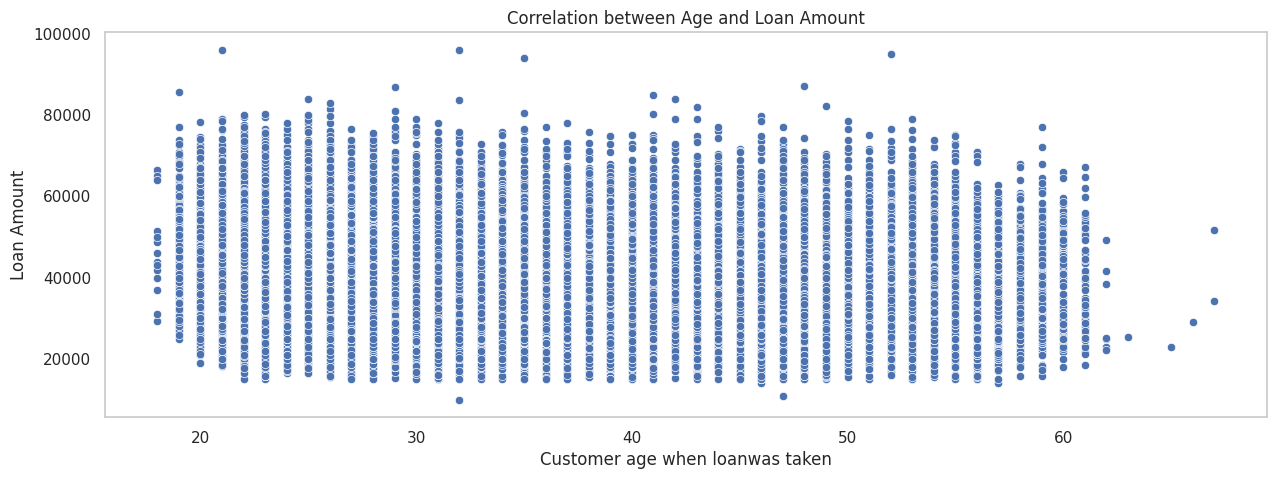

In [26]:
# Explore correlation between age and loan amount
plt.figure(figsize=(15, 5))
sns.scatterplot(data=credit_risk_renamed, x='Customer age when loanwas taken', y='Loan Amount')
plt.title("Correlation between Age and Loan Amount")
plt.gca().grid(False)  # Remove gridlines

In [30]:
credit_risk_renamed.columns

Index(['Customer ID', 'Customer has bounced in first EMI',
       'No of times bounced 12 months', 'Maximum MOB',
       'No of times bounced while repaying the loan', 'EMI', 'Loan Amount',
       'Tenure',
       'Dealer codes from where customer has purchased the Two wheeler',
       'Product code of Two wheeler', 'No of advance EMI paid',
       'Rate of interest', 'Gender', 'Employment type',
       'Resident type of customer', 'Date of birth',
       'Customer age when loanwas taken', 'No of loans', 'No of secured loans',
       'No of unsecured loans', 'Max amount sanctioned in the Live loans',
       'No of new loans in last 3 months',
       'Total sanctioned amount in the secured Loans which are Live',
       'Total sanctioned amount in the unsecured Loans which are Live',
       'Maximum amount sanctioned for any Two wheeler loan',
       'Time since last Personal loan taken (in months)',
       'Time since first consumer durables loan taken (in months)',
       'No of times 

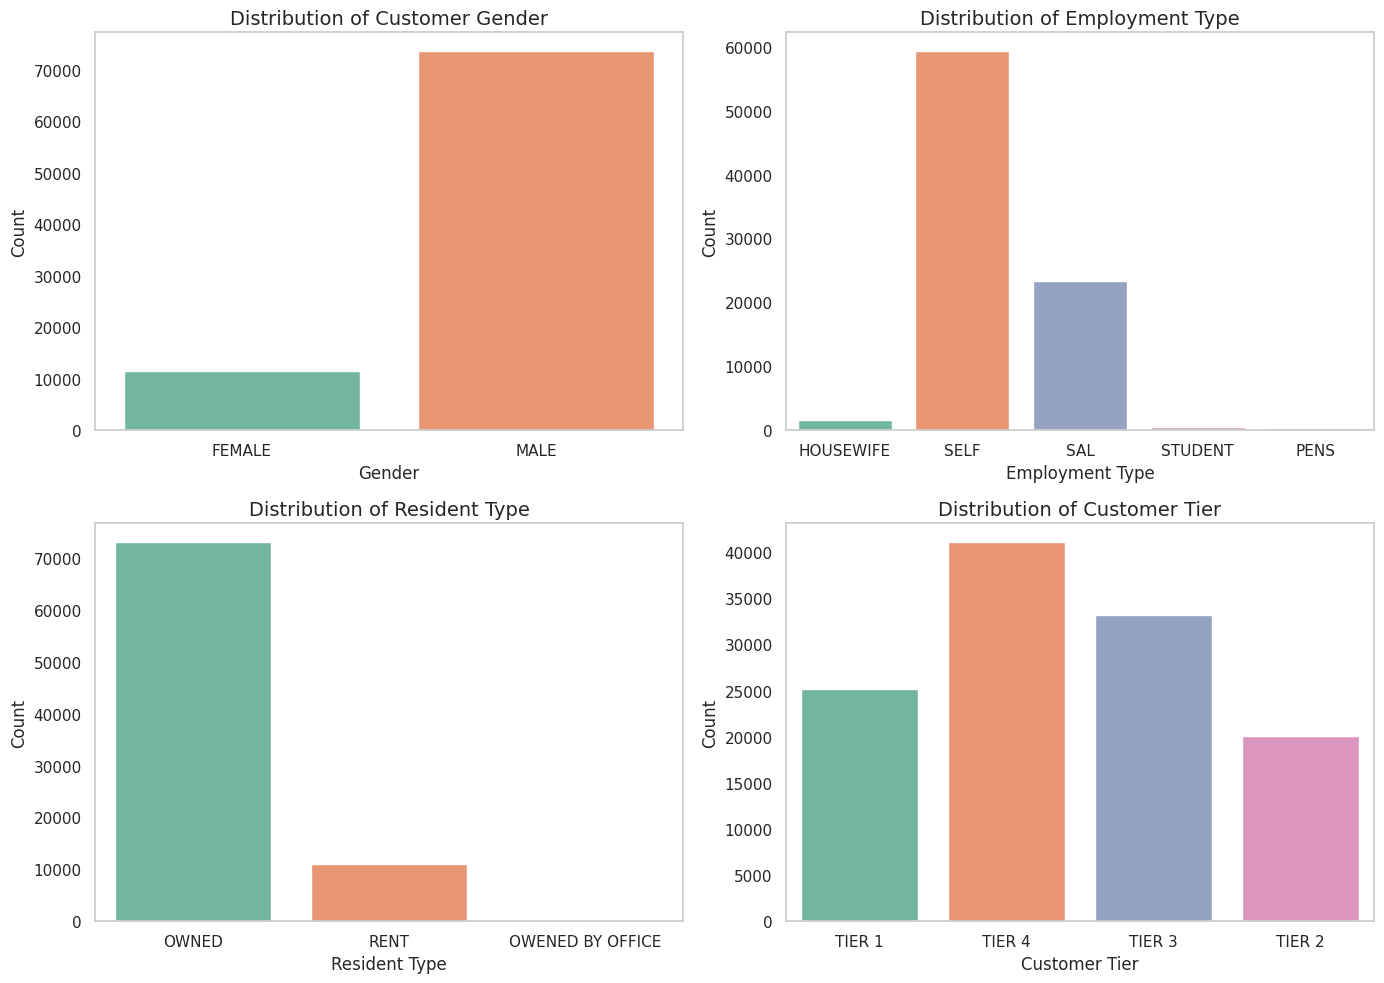

In [38]:
# Set the color palette for the plots
palette = sns.color_palette('Set2', n_colors=4)

# Create a larger figure size
plt.figure(figsize=(14, 10))

# Countplot for Gender
plt.subplot(2, 2, 1)
sns.countplot(x='Gender', data=credit_risk_renamed, palette=palette)
plt.title('Distribution of Customer Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.gca().grid(False)

# Countplot for Employment Type
plt.subplot(2, 2, 2)
sns.countplot(x='Employment type', data=credit_risk_renamed, palette=palette)
plt.title('Distribution of Employment Type', fontsize=14)
plt.xlabel('Employment Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.gca().grid(False)

# Countplot for Resident Type
plt.subplot(2, 2, 3)
sns.countplot(x='Resident type of customer', data=credit_risk_renamed, palette=palette)
plt.title('Distribution of Resident Type', fontsize=14)
plt.xlabel('Resident Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.gca().grid(False)

# Countplot for Customer Tier
plt.subplot(2, 2, 4)
sns.countplot(x='Tier', data=credit_risk_renamed, palette=palette)
plt.title('Distribution of Customer Tier', fontsize=14)
plt.xlabel('Customer Tier', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.gca().grid(False)

plt.tight_layout()
plt.show()

## DATA CLEANING

In [42]:
# Drop unnecessary columns
columns_to_drop = [
    'Customer ID',  # Unique identifier, not useful for analysis
    'Dealer codes from where customer has purchased the Two wheeler',  # Categorical, limited relevance
    'Product code of Two wheeler',  # High cardinality, limited relevance
    'Date of birth'  # Redundant, as 'Customer age when loan was taken' exists
]
credit_risk_renamed = credit_risk_renamed.drop(columns=columns_to_drop, axis=1)

# Drop columns with > 70% missing
columns_to_drop = [
    'Time since last Personal loan taken (in months)',
    'Total sanctioned amount in the unsecured Loans which are Live',
    'Total sanctioned amount in the secured Loans which are Live',
    'Time since first consumer durables loan taken (in months)',
    'Max amount sanctioned in the Live loans'
]
credit_risk_renamed = credit_risk_renamed.drop(columns=columns_to_drop, axis=1)

# Verify the updated DataFrame
print("Remaining columns:")
print(credit_risk_renamed.columns)

Remaining columns:
Index(['Customer has bounced in first EMI', 'No of times bounced 12 months',
       'Maximum MOB', 'No of times bounced while repaying the loan', 'EMI',
       'Loan Amount', 'Tenure', 'No of advance EMI paid', 'Rate of interest',
       'Gender', 'Employment type', 'Resident type of customer',
       'Customer age when loanwas taken', 'No of loans', 'No of secured loans',
       'No of unsecured loans', 'No of new loans in last 3 months',
       'Maximum amount sanctioned for any Two wheeler loan',
       'No of times 30 days past due in last 6 months',
       'No of times 60 days past due in last 6 months',
       'No of times 90 days past due in last 3 months', 'Tier',
       'Target variable'],
      dtype='object')


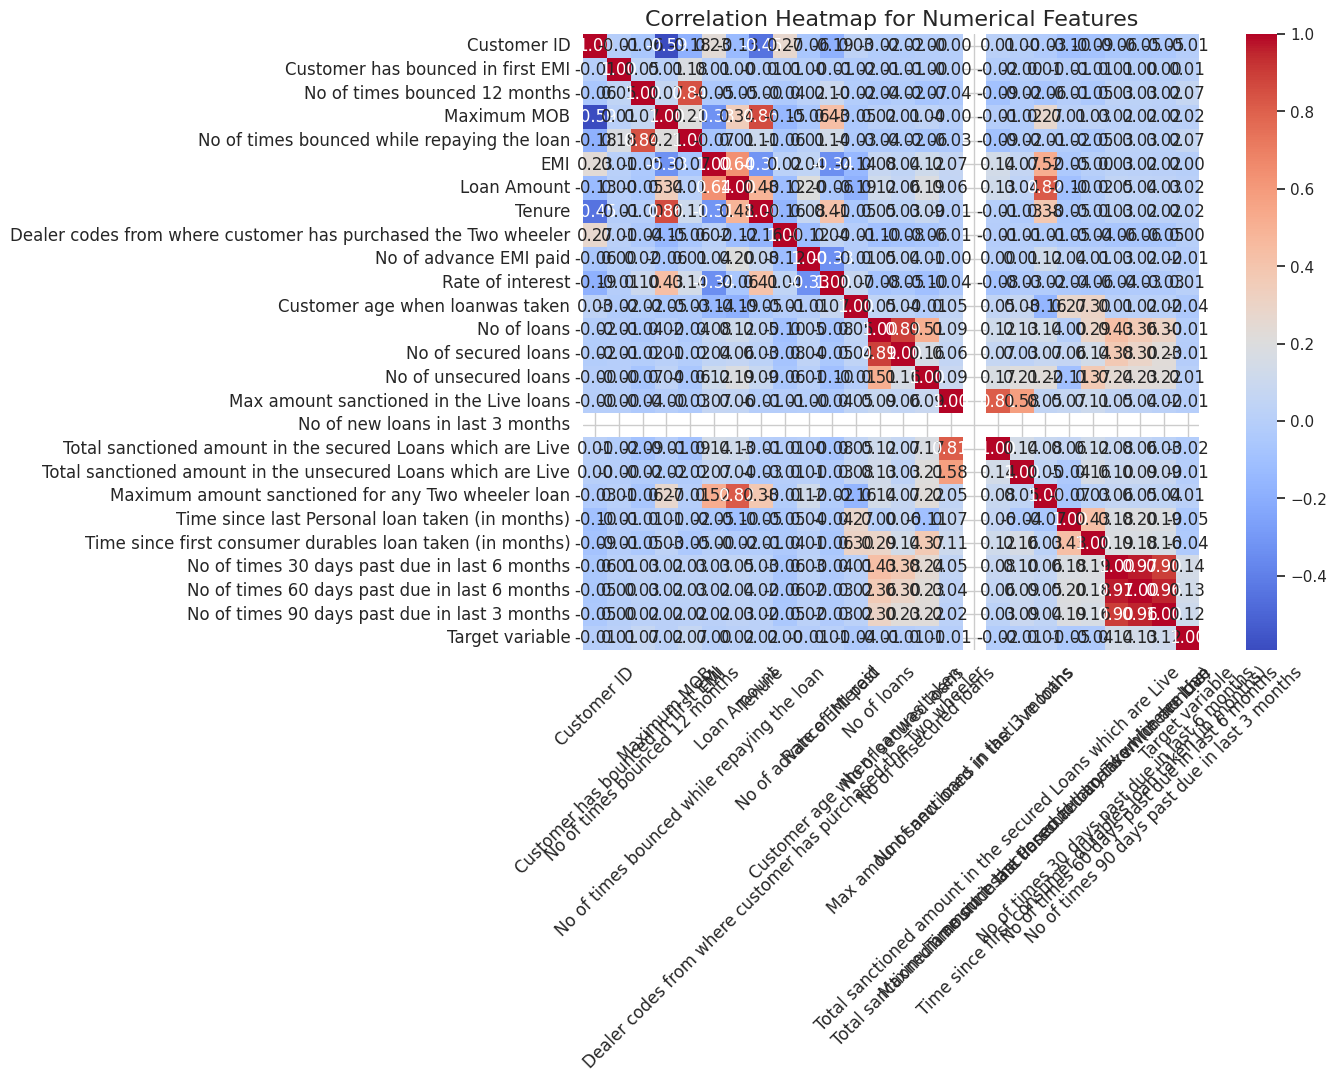

In [39]:
# Correlation heatmap for numerical features
plt.figure(figsize=(12, 8))
numerical_features = credit_risk_renamed.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = credit_risk_renamed[numerical_features].corr()

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap for Numerical Features', fontsize=16)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()